In [1]:
!nvidia-smi

Sat May 25 19:22:02 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce GTX 1050        On  |   00000000:01:00.0 Off |                  N/A |
| N/A   66C    P8             N/A / ERR!  |       0MiB /   4096MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/home/amir/projectaw


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.230
!pip install "ultralytics.nn.modules.conv"

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
Setup complete ✅ (8 CPUs, 7.5 GB RAM, 383.0/913.5 GB disk)


In [5]:
from ultralytics import YOLO

from IPython.display import display, Image

In [9]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="zZozGIc2Jnv4iJZTkO4S")
project = rf.workspace("jc-gtcra").project("carmodels-2fz8x")
version = project.version(1)
dataset = version.download("folder")

/home/amir/projectaw/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CarModels-1 in folder:: 100%|█| 4418/4418 [00:00<00


## Custom Training

In [21]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8n-cls.pt data={dataset.location} epochs=50 imgsz=128

/home/amir/projectaw
New https://pypi.org/project/ultralytics/8.2.21 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/home/amir/projectaw/datasets/CarModels-1, epochs=50, time=None, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=F

In [22]:
!ls -la {HOME}/runs/classify/train/

總用量 228
drwxr-xr-x 1 amir amir   150  5月 25 19:23 .
drwxr-xr-x 1 amir amir    58  5月 25 19:28 ..
-rw-r--r-- 1 amir amir  1476  5月 25 19:22 args.yaml
-rw-r--r-- 1 amir amir  4032  5月 25 19:25 results.csv
-rw-r--r-- 1 amir amir 67884  5月 25 19:23 train_batch0.jpg
-rw-r--r-- 1 amir amir 74691  5月 25 19:23 train_batch1.jpg
-rw-r--r-- 1 amir amir 75005  5月 25 19:23 train_batch2.jpg
drwxr-xr-x 1 amir amir    28  5月 25 19:23 weights


In [23]:
!cat {HOME}/runs/classify/train/results.csv | head -10

                  epoch,             train/loss,  metrics/accuracy_top1,  metrics/accuracy_top5,               val/loss,                 lr/pg0,                 lr/pg1,                 lr/pg2
                      1,                 2.9006,                0.19908,                0.53089,                  2.899,             0.00023675,             0.00023675,             0.00023675
                      2,                 2.2706,                0.32952,                0.72998,                 2.7962,             0.00046535,             0.00046535,             0.00046535
                      3,                 1.5013,                0.36842,                 0.7643,                 2.7253,             0.00068453,             0.00068453,             0.00068453
                      4,                0.86726,                0.38673,                0.77346,                   2.69,             0.00067159,             0.00067159,             0.00067159
                      5,                

## Validate Custom Model

In [24]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data={dataset.location}

/home/amir/projectaw
Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
/home/amir/.miniforge3/envs/colab/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
YOLOv8n-cls summary (fused): 73 layers, 1459219 parameters, 0 gradients, 3.3 GFLOPs
train: /home/amir/projectaw/datasets/CarModels-1/train... found 3051 images in 19 classes ✅ 
val: /home/amir/projectaw/datasets/CarModels-1/val... found 868 images in 19 classes ✅ 
test: /home/amir/projectaw/datasets/CarModels-1/test... found 437 images in 19 classes ✅ 
val: Scanning /home/amir/projectaw/datasets/CarModels-1/val... 868 images, 0 cor
               classes   top1_acc   top5_acc: 100%|██████████|

## Inference with Custom Model

In [25]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source={dataset.location}/test/Toyota

/home/amir/projectaw
Ultralytics YOLOv8.0.230 🚀 Python-3.12.3 torch-2.3.0+cu121 CUDA:0 (NVIDIA GeForce GTX 1050, 4034MiB)
/home/amir/.miniforge3/envs/colab/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
YOLOv8n-cls summary (fused): 73 layers, 1459219 parameters, 0 gradients, 3.3 GFLOPs

image 1/31 /home/amir/projectaw/datasets/CarModels-1/test/Toyota/098f283ad9da0123fd046ac3b80f03de_png_jpg.rf.3b785cd13502f3b7d77a5e9195789b20.jpg: 128x128 Toyota 1.00, Lexus 0.00, Lamborghini 0.00, Kia 0.00, hyundai 0.00, 2.7ms
image 2/31 /home/amir/projectaw/datasets/CarModels-1/test/Toyota/0b3cbf9e06e2e7569f780a74d40dfd67x_jpg.rf.eb86747b66636dbc638ea364d1326449.jpg: 128x128 Maserati 0.29, Dodge 0.29, Ford m

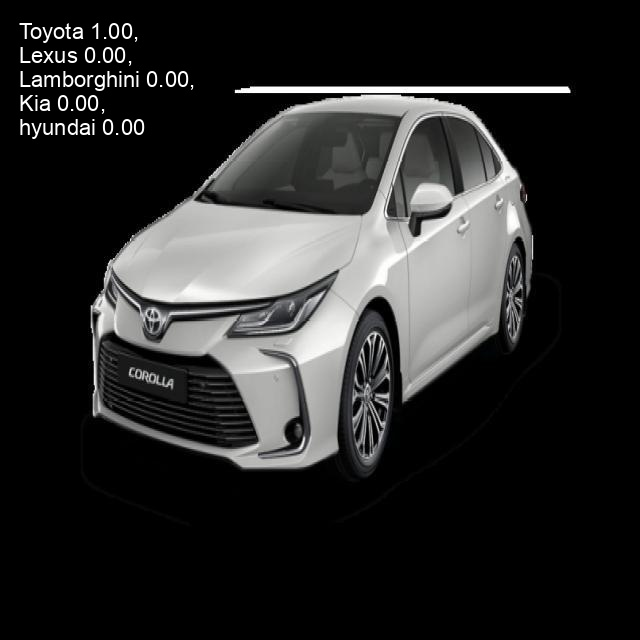

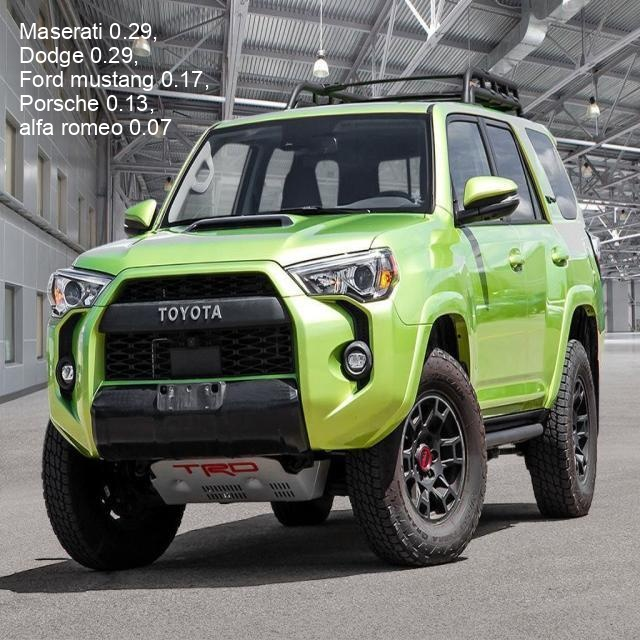

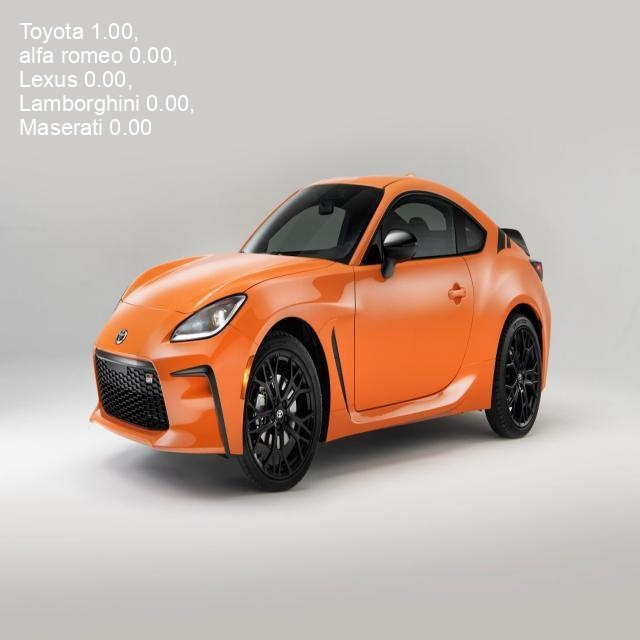

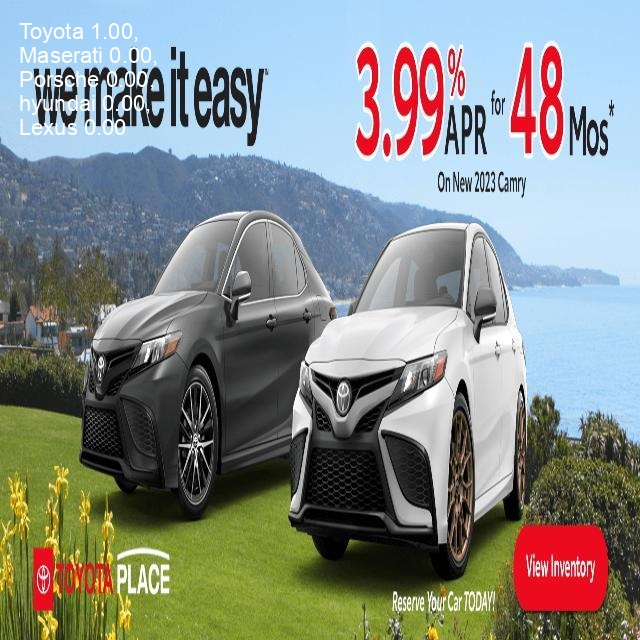

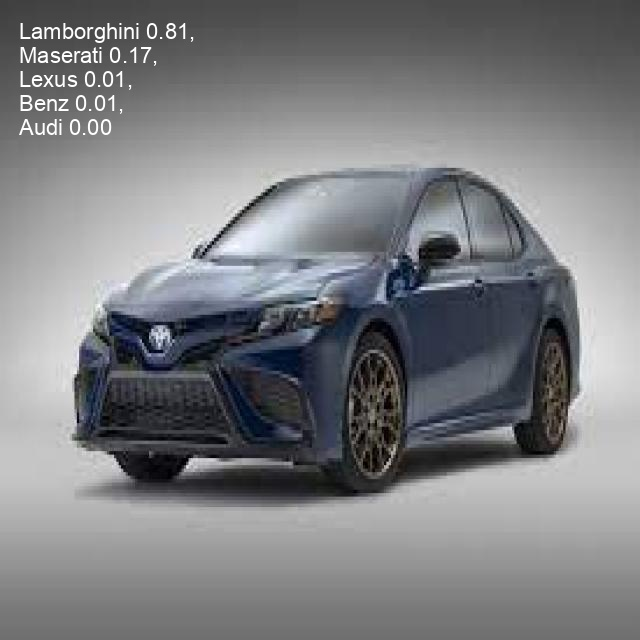

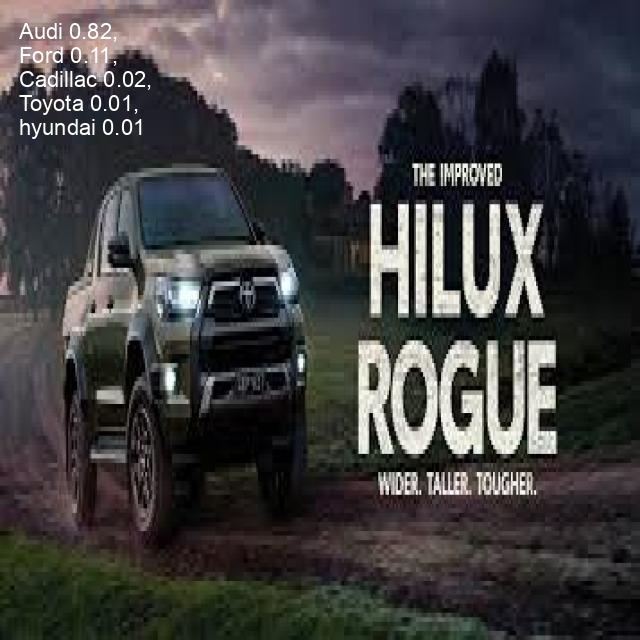

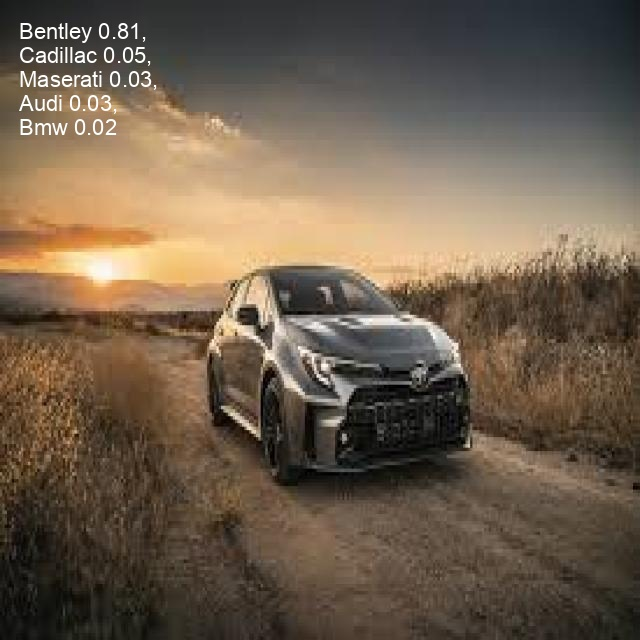

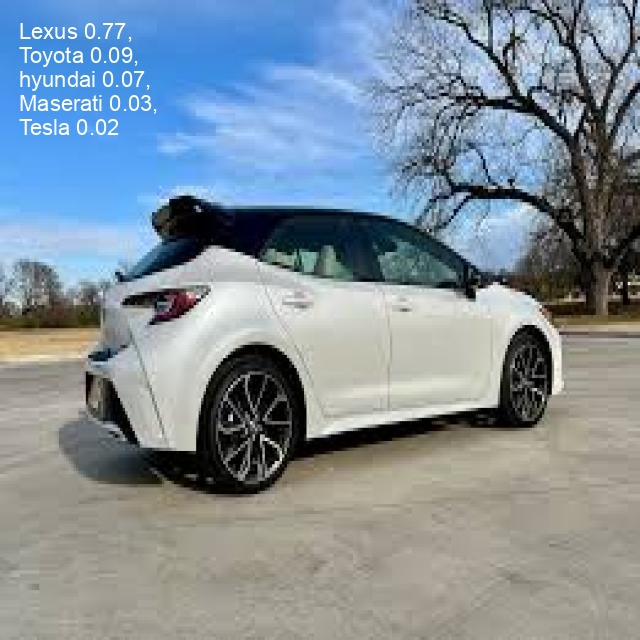

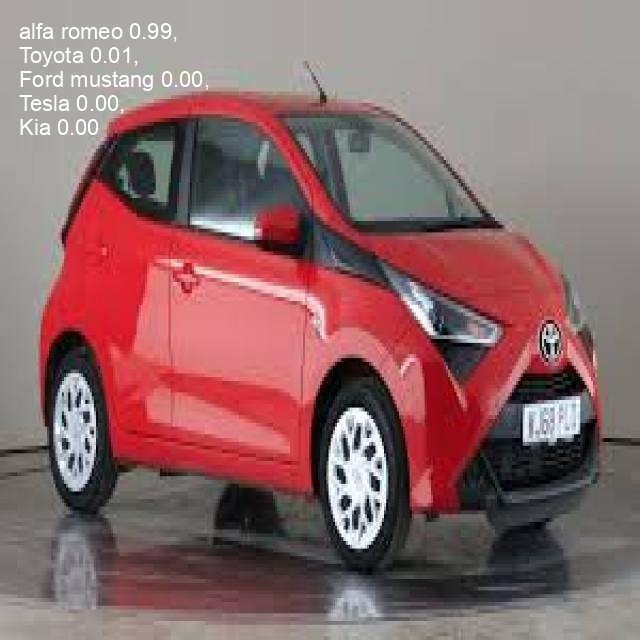

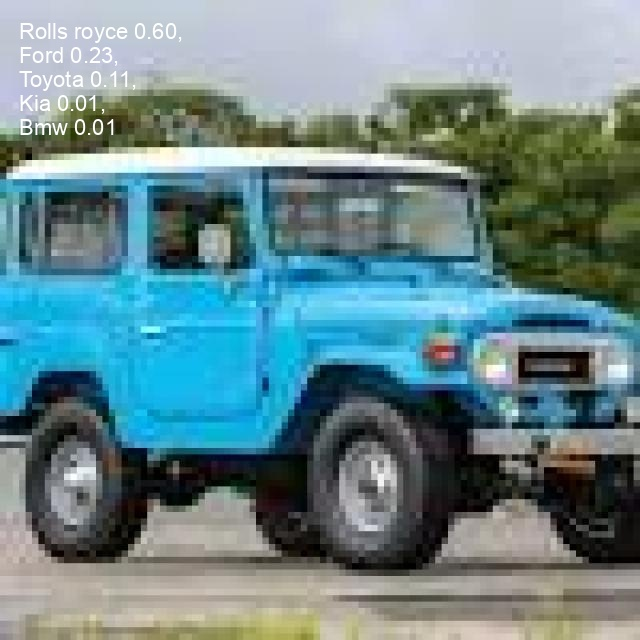

In [29]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict3/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")